<div style="text-align: center; border: 1px solid black;">
    <div style="display: inline-flex; justify-content: center; align-items: center; ">
        <img src="https://www.di.ubi.pt/~rcampos/assets/img/ubi.jpg" alt="First Image" style="margin: 10px;"/>
        <img src="https://www.di.ubi.pt/~rcampos/assets/img/DI_FE.jpg" alt="Second Image" style="margin: 10px;"/>
    </div>
</div>

<b><center><font size="4">Mini Projeto II <br /> Data Acquisition - Web Scraping</font></center></b>
<center><font size="2">Elaborado por: <br /> <b>Tassia da Silva de Carvalho</b><br />(M14307 - tassia.carvalho@ubi.pt)</font></center>
<br />
<div style="text-align: center;">
    <font size="2">Trabalho apresentado no âmbito da disciplina de <b>Ciência de Dados</b>, sob orientação do <b>Prof. Dr Ricardo Campos</b></font><br>
</div>

<div style="text-align: center;">
    <b>Objetivo</b>: Familiarização com o processo de aquisição de dados com recurso a web
scraping.
</div>

<font size="1">Observação: Os arquivos com os dados extraídos estão disponíveis em: 
<br />https://drive.google.com/drive/folders/10f74UCcIJSWwgFuz5BBnEPbvF8XNFml2?usp=sharing


<hr />

## Tarefa

🔹  O objetivo desta atividade <b>foi extrair informações de uma página web estática</b>, utilizando exclusivamente a biblioteca <b>BeautifulSoup</b> em Python. O site escolhido foi o <b>Worldometer</b>, especificamente a página de <b>população por país</b>:<br /> 🔗 https://www.worldometers.info/world-population/population-by-country/

###  Descrição do Processo

🔹 O processo foi dividido em duas fases principais:

✅ <b>1. Extração dos dados da tabela de países</b>
Utilizando a biblioteca requests para obter o HTML e BeautifulSoup para analisá-lo, foram extraídas as seguintes informações da tabela principal do site:

<ul> 
    <li>Posição no ranking</li> 
    <li>Nome do país</li> 
    <li>População total</li> 
    <li>Taxa de crescimento populacional anual</li> 
    <li>Densidade populacional</li> 
    <li>Área total em km²</li> 
</ul>

✅ <b>2. Análise automatizada via modelo de linguagem</b>

Para exemplificar a utilização dos dados após a extração, os 10 primeiros países foram enviados para um modelo de linguagem natural (LLM) através da API gratuita do OpenRouter. O modelo gerou uma breve análise sobre a situação populacional de cada país, considerando os dados coletados.

<table border="1" cellpadding="10" cellspacing="0">
  <caption> Bibliotecas utilizadas </caption>
  <thead>
    <tr style="background-color:#f0f0f0;">
      <th>Biblioteca Python</th>
      <th>Descrição</th>
      <th>Motivo da Escolha</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>requests</strong></td>
      <td>Permite fazer requisições HTTP em Python para acessar páginas da web.</td>
      <td>Facilidade para obter o conteúdo HTML da tabela com dados populacionais.</td>
    </tr>
    <tr>
      <td><strong>beautifulsoup4</strong></td>
      <td>Utilizada para análise (parsing) e extração de informações estruturadas de páginas HTML.</td>
      <td>Praticidade na navegação e coleta dos dados tabulares da página.</td>
    </tr>
  </tbody>
</table>


In [ ]:
pip install requests beautifulsoup4

In [1]:
import requests
from bs4 import BeautifulSoup
import json

# URL atualizada
URL = "https://www.worldometers.info/world-population/population-by-country/"

# Requisição com headers para simular navegador
headers = {"User-Agent": "Mozilla/5.0"}
resposta = requests.get(URL, headers=headers)

# Análise da página
soup = BeautifulSoup(resposta.content, 'html.parser')

# Encontrar a tabela correta pela nova classe
tabela = soup.find("table", class_="datatable")

# Verificação e extração
paises = []
if tabela:
    linhas = tabela.tbody.find_all("tr")
    for linha in linhas:
        colunas = linha.find_all("td")
        if len(colunas) >= 7:
            pais = {
                "rank": colunas[0].text.strip(),
                "nome": colunas[1].text.strip(),
                "populacao": colunas[2].text.strip(),
                "taxa_crescimento_anual": colunas[3].text.strip(),
                "densidade": colunas[5].text.strip(),
                "area_km2": colunas[6].text.strip()
            }
            paises.append(pais)
else:
    print("❌ Tabela não encontrada. Verifique a classe da tabela.")

# Salvar os dados
with open("paises_populacao.json", "w", encoding="utf-8") as f:
    json.dump(paises, f, ensure_ascii=False, indent=4)

print(f"✅ {len(paises)} países extraídos e salvos com sucesso.")

✅ 233 países extraídos e salvos com sucesso.


<b>Armazenamento dos Dados</b>

Os dados extraídos foram <b>estruturados e salvos num ficheiro JSON</b> chamado <code>paises_populacao.json</code>, facilitando a análise posterior com outras ferramentas ou bibliotecas. Cada entrada representa um país e contém:

In [ ]:
{
  "rank": "1",
  "nome": "China",
  "populacao": "1,411,778,724",
  "taxa_crescimento_anual": "0.34%",
  "densidade": "151",
  "area_km2": "9,388,211"
}

### Extensão: Uso de LLM para Análise

Após a extração dos dados, foi implementada uma funcionalidade adicional de <b>análise automática da situação demográfica dos países</b>, com apoio de um <b>modelo de linguagem (LLM)</b>. Essa análise foi aplicada aos 10 primeiros países extraídos e os resultados foram adicionados ao JSON <code>'paises_analise.json'</code>

In [1]:
import requests
import json
import time

here = Path(__file__).resolve().parent if "__file__" in globals() else Path().cwd()
keys_path = here.parents[1] / "keys.json"
with open(keys_path, "r", encoding="utf-8") as f:
    API_KEY = json.load(f)["openrouter"]

MODEL = "mistralai/mistral-7b-instruct:free"

def analisar_pais(pais):
    prompt = (
        f"Analise brevemente a situação do país {pais['nome']} que possui "
        f"uma população de {pais['populacao']}, taxa de crescimento anual de {pais['taxa_crescimento_anual']}, "
        f"densidade populacional de {pais['densidade']} habitantes por km² e área de {pais['area_km2']} km²."
    )

    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }

    data = {
        "model": MODEL,
        "messages": [
            {"role": "user", "content": prompt}
        ]
    }

    response = requests.post("https://openrouter.ai/api/v1/chat/completions", headers=headers, json=data)

    if response.status_code == 200:
        return response.json()['choices'][0]['message']['content'].strip()
    else:
        return f"❌ Erro {response.status_code}: {response.text}"

# Carrega os dados
with open("paises_populacao.json", "r", encoding="utf-8") as f:
    paises = json.load(f)

# Mantém só os 10 primeiros
top_10 = paises[:10]

# Análise
for i, pais in enumerate(top_10):
    print(f"🔎 Analisando {i+1}/10: {pais['nome']}")
    pais['analise'] = analisar_pais(pais)
    time.sleep(1.5)

# Salva novo JSON
with open("paises_analise.json", "w", encoding="utf-8") as f:
    json.dump(top_10, f, ensure_ascii=False, indent=4)

print("\n✅ Análises dos 10 países salvas em 'paises_analise.json'")


NameError: name 'Path' is not defined

### Exemplo de Visualização os Dados

Para exemplificar a exploração dos dados extraídos e analisados, foi criado um script transformando os dados em um DataFrame pandas.

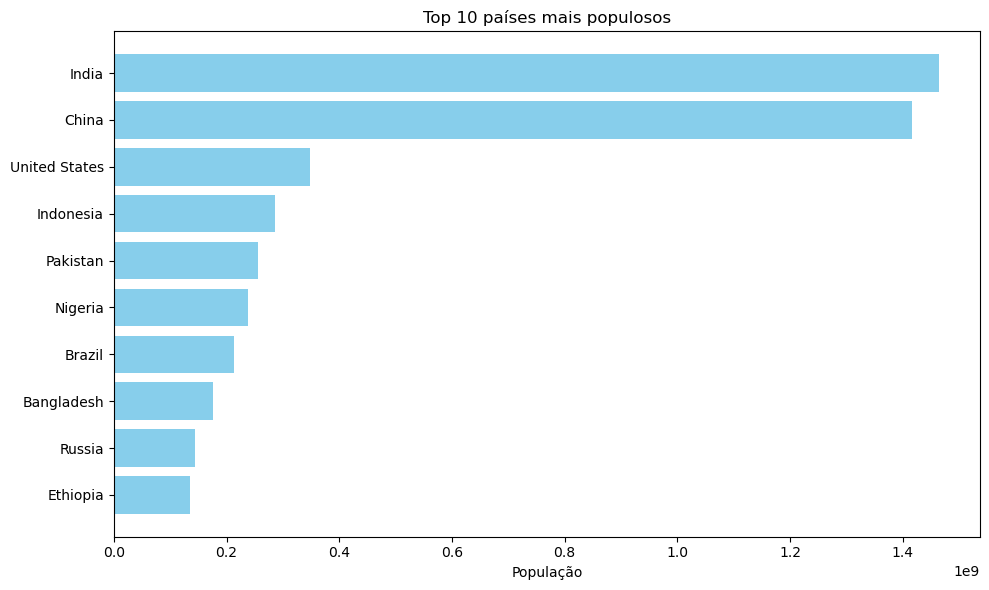


📊 Análise gerada pela LLM (Top 10 países):



,nome,analise
0,India,"A Índia é um país localizado na Ásia Sul, com uma população de aproximadamente 1,463 milhões de habitantes, sendo o segundo país mais populoso do mundo. A taxa de crescimento anual é de 0,89%, o que indica um aumento lento, mas contínuo, da população. A densidade populacional é de 492 habitantes por quilômetro quadrado, o que reflete a alta concentração de pessoas em áreas urbanas. A Índia possui uma área de 2,973,190 km², sendo o sétimo país mais extenso do mundo. Essas estatísticas indicam uma população densamente concentrada em um território relativamente grande, o que pode apresentar desafios em termos de infraestrutura, serviços públicos e meio ambiente."
1,China,"A China é o país mais populoso do mundo, com uma população de aproximadamente 1,416 milhões de habitantes. No entanto, a taxa de crescimento anual da população é negativa (-0.23%), o que indica uma tendência de diminuição gradual da população. A densidade populacional é de 151 habitantes por km², o que reflete a alta concentração de pessoas em áreas urbanas e a escassez de espaço em áreas rurais. A área total da China é de 9,388,211 km². Essas informações podem ser utilizadas para analisar a estrutura demográfica, planejar o uso do espaço e desenvolver políticas públicas para lidar com questões como a migração, a saúde pública e a educação."
2,United States,"O país em questão é os Estados Unidos da América. Possui uma população de aproximadamente 347 milhões de habitantes, com um crescimento anual de 0.54%. A densidade populacional é de 38 habitantes por quilômetro quadrado, e a área do país é de 9,147,420 km².\n\nEsses dados indicam que o crescimento populacional é lento, mas ainda assim o país possui uma densidade populacional moderada, considerando sua extensa área."


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Carrega o arquivo JSON
with open("paises_analise.json", encoding="utf-8") as f:
    dados = json.load(f)

# Converte para DataFrame
df = pd.DataFrame(dados)

# Garante que o campo população seja numérico (removendo vírgulas)
df["populacao"] = df["populacao"].str.replace(",", "").astype(int)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(df["nome"], df["populacao"], color="skyblue")
plt.xlabel("População")
plt.title("Top 10 países mais populosos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Mostra tabela com nome do país e análise feita pela LLM dos 3 maiores países
tabela_llm = df[["nome", "analise"]].head(3)
pd.set_option('display.max_colwidth', None)
print("\n📊 Análise gerada pela LLM (Top 10 países):\n")
display(tabela_llm)  

### Resumo das interações com GPT 4 💬

🔹 Objetivo Inicial:

Inicialmente, descrevi as atividades propostas e as restrições exigidas, indicando também a área de interesse:

<code>"As atividades devem ser feitas utilizando Python. Pensei em algo como um web scraping dos discursos presidenciais (https://www.gov.br/planalto/pt-br/acompanhe-o-planalto/discursos). Na Atividade 1 devo utilizar apenas a biblioteca BeautifulSoup. O script deve acessar a página, extrair os dados de título, data com hora, link do discurso e tags associadas. Para cada discurso, ele também deve acessar a página individual e extrair o subtítulo (classe documentDescription description) e o texto completo (classe content-core)."</code>

Esse foi o prompt inicial. Ele gerou todos os códigos iniciais. No entanto, a estrutura do site revelou-se dinâmica, exigindo o uso de Selenium, o que não era permitido para a tarefa.

Tentei então alterar a fonte para os discursos de ex-presidentes (https://www.biblioteca.presidencia.gov.br/presidencia/ex-presidentes/luiz-inacio-lula-da-silva/discursos), alterei o script inicial, e seus elementos, mas o site apresentava erros de SSL (o hostname não correspondia ao certificado), e posteriormente as conexões automatizadas passaram a ser recusadas. Apesar de tratar essas exceções, a coleta tornou-se inviável, limitando-se apenas ao nome dos presidentes.

Diante disso, optei por alterar o tema, utilizando o site do Worldometers (https://www.worldometers.info/world-population/population-by-country/), que oferece uma página estática com dados estruturados em tabela.

Para geração do código, indiquei a classe da tabela (.datatable) e a estrutura desejada. Também manifestei interesse em aplicar uma análise automática com um modelo de linguagem (LLM). Inicialmente, a proposta era utilizar a API da OpenAI, mas por ser paga, solicitei a substituição por uma alternativa gratuita — e assim chegamos ao uso do OpenRouter.

O prompt final, já com todas as definições ajustadas, foi:

<code>"Vamos lá... Faça isso então: extraia os dados da tabela (.datatable), depois vamos passar pela LLM onde ela irá analisar a situação do país a partir desses dados."</code>

## Tarefa

🔹 Objetivo da Tarefa foi <b>extraia informação a partir de uma página dinâmica</b>. Contextualizando: foi desenvolvido um script em Python para coletar dados e imagens em destaque na página de tendências da <b>plataforma Unsplash</b>, utilizando Selenium para web scraping dinâmico. 

### Etapas da Implementação

✅ 1. Configuração do Ambiente
Instalação e configuração das bibliotecas necessárias, como selenium, webdriver_manager.

In [ ]:
pip install selenium webdriver-manager

✅ 2. Extração de Dados com Selenium

Rolar a página dinamicamente para carregar imagens.
Capturar os links das imagens em destaque.
Acessar cada página individual de imagem e extrair:
<ul>
    <li>Link da imagem</li>
    <li>Nome e perfil do autor</li>
    <li>Número de visualizações e downloads</li>
    <li>Tags associadas</li>
    <li>Data de publicação</li>
    <li>Licença de uso</li>
    <li>Timestamp e coleta_id</li>  
</ul>


<b>Coleta Cíclica, Logging e Armazenamento dos Dados</b><br />
O script executa coletas em ciclos (a cada hora), controlando o coleta_id de forma incremental.

As informações de cada rodada são registradas no terminal e em um arquivo de log <code>(unsplash_log.log)</code>.

Os dados são salvos em <code>JSON no arquivo unsplash_tendencias.json </code> no formato exemplificado abaixo:

In [ ]:
{
  "coleta_id": 1,
  "timestamp": "2025-03-31 12:00:00",
  "imagem": "https://images.unsplash.com/...",
  "autor": "Nome do autor",
  "tags": ["nature", "sunset"],
  "downloads": "1.2K",
  "visualizacoes": "5K",
  "data_publicacao": "Publicada em 2024"
}

<table border="1" cellpadding="10" cellspacing="0">
  <caption><b>Bibliotecas Utilizadas</b></caption>
  <thead>
    <tr style="background-color:#f0f0f0;">
      <th>Biblioteca</th>
      <th>Descrição</th>
      <th>Motivo da Escolha</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>selenium</strong></td>
      <td>Biblioteca para automação de navegadores. Permite interagir com páginas web dinâmicas como se fosse um usuário real.</td>
      <td>Essencial para páginas que carregam conteúdo dinamicamente via JavaScript, como o Unsplash.</td>
    </tr>
    <tr>
      <td><strong>logging</strong></td>
      <td>Biblioteca padrão do Python para registrar mensagens de log durante a execução do programa.</td>
      <td>Facilita o monitoramento, depuração e rastreamento de erros e eventos no script.</td>
    </tr>
  </tbody>
</table>

<b>Este script automatiza a extração de dados da seção de wallpapers do site Unsplash</b>, coletando <b>periodicamente</b> informações de imagens, como autor, visualizações, downloads, tags e data de publicação. Os dados são salvos em <code>unsplash_tendencias.json.</code>

<b>Obs.: Se tratando de uma página com muitas imagens, e sabendo que ela já classifica por tendência, para tornar o script mais leve, é selecionado somente 10 imagens a cada ciclo <em>NUM_IMAGENS_POR_CICLO = 10</em></b>

In [ ]:
import json
import logging
import time
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Configuração de logging
logging.basicConfig(
    filename="unsplash_log.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# Configuração invisível do Chrome (headless)
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--log-level=3")

# Inicializa o navegador com o WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

URL_BASE = "https://unsplash.com/t/wallpapers"
NUM_IMAGENS_POR_CICLO = 10

def scroll_page():
    # Simula rolagem da página para carregar mais imagens dinamicamente
    last_height = driver.execute_script("return document.body.scrollHeight")
    for _ in range(3):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

def extrair_dados_detalhados(link_img, coleta_id):
    try:
        driver.get(link_img)
        time.sleep(2)
        wait = WebDriverWait(driver, 10)
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "img[alt][src*='images.unsplash.com']")))

        # Autor
        try:
            autor_el = driver.find_element(By.CSS_SELECTOR, "a.bimlc.Pc_c1.rkYpC.wQd_A")
            nome_autor = autor_el.text.strip()
            link_autor = autor_el.get_attribute("href")
        except:
            nome_autor = "Desconhecido"
            link_autor = ""

        # Imagem
        img_grande = driver.find_element(By.CSS_SELECTOR, "button img[src*='images.unsplash.com']")
        link_imagem = img_grande.get_attribute("src")


        # Estatísticas
        try:
            stats = driver.find_elements(By.CSS_SELECTOR, "div.T6zc2 div._sbHj span.sZ3iN")
            visualizacoes = stats[0].text if len(stats) > 0 else "N/A"
            downloads = stats[1].text if len(stats) > 1 else "N/A"
        except:
            visualizacoes = "N/A"
            downloads = "N/A"

        # Tags
        try:
            container_tags = driver.find_element(By.CSS_SELECTOR, ".uN4_r.J83KD")
            tags = [el.text.strip() for el in container_tags.find_elements(By.CSS_SELECTOR, ".qOAId.yZhvJ.FTKrh")]
        except:
            tags = []

        # Data de publicação
        try:
            spans = driver.find_elements(By.CSS_SELECTOR, "span.X5fE_.yZhvJ")
            data_publicacao = next((s.text for s in spans if "Publicada" in s.text), "")
        except:
            data_publicacao = ""

        return {
            "coleta_id": coleta_id,
            "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            "imagem": link_imagem,
            "link": link_img,
            "autor": nome_autor,
            "perfil_autor": link_autor,
            "visualizacoes": visualizacoes,
            "downloads": downloads,
            "tags": tags,
            "data_publicacao": data_publicacao,
            "licenca": "Unsplash License"
        }

    except Exception as e:
        logging.warning(f"Erro ao processar imagem {link_img}: {e}")
        return None

def main():
    coleta_id = 1
    rodada = 1
    try:
        try:
            with open("unsplash_tendencias.json", "r", encoding="utf-8") as f:
                dados = json.load(f)
                if dados:
                    coleta_id = dados[-1]["coleta_id"] + 1
        except FileNotFoundError:
            dados = []

        while True:
            logging.info("Iniciando nova coleta no Unsplash...")
            driver.get(URL_BASE)
            scroll_page()

            links_imgs = driver.find_elements(By.CSS_SELECTOR, "a[itemprop='contentUrl']")
            links_unicos = list({
                link.get_attribute("href") for link in links_imgs
                if link.get_attribute("href") and "/fotografias/" in link.get_attribute("href")
            })

            logging.info(f"{len(links_unicos)} links coletados. Processando até {NUM_IMAGENS_POR_CICLO} imagens...")

            #coleta 10 sempre
            coletadas = 0
            i = 0
            while coletadas < NUM_IMAGENS_POR_CICLO and i < len(links_unicos):
                link = links_unicos[i]
                info = extrair_dados_detalhados(link, coleta_id)
                if info:
                    dados.append(info)
                    with open("unsplash_tendencias.json", "w", encoding="utf-8") as f:
                        json.dump(dados, f, ensure_ascii=False, indent=4)
                    logging.info(f"Imagem registrada: {info['autor']} - {info['imagem']}")
                    coletadas += 1
                    coleta_id += 1
                i += 1
                time.sleep(1)


            coleta_id += 1
            mensagem = f"🌀 RODADA {rodada} FINALIZADA COM SUCESSO 🌀"
            borda = "━" * (len(mensagem) + 2)
            print(f"\n{borda}\n {mensagem} \n{borda}\n")
            logging.info(mensagem)
            rodada += 1

            logging.info("Coleta finalizada, aguardando próximo ciclo...")
            time.sleep(3600)  # ⏱️ 3600 se for de hora em hora

    except KeyboardInterrupt:
        logging.info("Script interrompido manualmente.")
    finally:
        driver.quit()
        logging.info("Driver encerrado.")

if __name__ == "__main__":
    main()

### Execução cíclica

🔹 Execução do Script: Escolha da Plataforma

Inicialmente, considerei utilizar o PythonAnywhere para a execução do script, mas a plataforma não oferece suporte ao Selenium, o que inviabilizou essa opção. Em seguida, avaliei o uso do Google Colab, que, embora gratuito, exigia ajustes adicionais e manutenção constante para funcionar corretamente com Selenium. Também foi considerada a possibilidade de usar o ChatGPT com Plugins/API, mas essa alternativa não permitiria a execução contínua por 48 horas.

Diante dessas limitações, optei por executar o script localmente, garantindo maior controle, estabilidade e a possibilidade de manter o código em execução contínua, conforme necessário.

<table border="1" cellpadding="10" cellspacing="0">
  <caption><b>Opções de Execução de Script com Selenium</b></caption>
  <thead>
    <tr style="background-color:#f0f0f0;">
      <th>Opção</th>
      <th>Suporta Selenium?</th>
      <th>Rodar 48h?</th>
      <th>Gratuito?</th>
      <th>Comentário</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>PythonAnywhere</strong></td>
      <td>❌</td>
      <td>Não</td>
      <td>✅</td>
      <td>Bom para scripts simples</td>
    </tr>
    <tr>
      <td><strong>Google Colab</strong></td>
      <td>⚠️ (com ajustes)</td>
      <td>⚠️</td>
      <td>✅</td>
      <td>Exige manutenção</td>
    </tr>
    <tr>
      <td><strong>Local (PC ligado)</strong></td>
      <td>✅</td>
      <td>✅</td>
      <td>✅</td>
      <td>Simples e eficaz</td>
    </tr>
    <tr>
      <td><strong>ChatGPT Plugin/API</strong></td>
      <td>✅ p/ testes</td>
      <td>❌</td>
      <td>Incluído</td>
      <td>Apenas temporário</td>
    </tr>
  </tbody>
</table>


Apesar da decisão de executar o script localmente garantir maior controle e autonomia, essa abordagem também apresentou riscos. Por desatenção, a opção de hibernação do computador não foi desativada, o que causou uma interrupção temporária na coleta automática de dados durante a madrugada.

Essa falha pode ser verificada diretamente no log gerado (linha 102 e 103):

In [ ]:
2025-03-31 03:15:21,788 - INFO - Coleta finalizada, aguardando próximo ciclo...
2025-03-31 10:11:08,049 - INFO - Iniciando nova coleta no Unsplash...

Apesar da interrupção causada pela hibernação do computador durante a execução local do script, a essência da atividade foi plenamente mantida. O erro ocorrido, embora não tenha comprometido o funcionamento geral, refletiu uma limitação operacional pontual e facilmente resolvível.

A coleta foi realizada com sucesso em diversos ciclos, os dados foram devidamente armazenados em formato estruturado (`JSON`), e todos os objetivos propostos na atividade foram atingidos, incluindo:

- Uso do `Selenium` para navegação e extração dinâmica de conteúdo.  
- Registro automático de logs para rastreabilidade.  
- Persistência dos dados extraídos com controle de identificação por coleta.  

Assim, mesmo com essa pausa temporária, **a atividade demonstra domínio sobre os conceitos e ferramentas exigidos**, além de mostrar um fluxo de coleta automatizado funcional e adaptável.

🔹 <b>Observação:</b>
O processo de coleta foi realizado em duas etapas:

<b>Parte 1:</b> Durante esta etapa, ocorreu a interrupção devido à hibernação, e constatou-se um erro: o link da página da imagem estava correto, mas o endereço da imagem estava divergente. Em decorrência deste problema, foi gerado um novo arquivo contendo a coleta dos dados corrigida.

<b>Parte 2:</b> Realizou-se a correção da coleta de forma direta e adequada.

### Exemplo de Visualização os Dados

O script lê o arquivo unsplash_tendencias_parte2.json e converte os dados para um DataFrame do pandas. Dessa forma, é possível manipular e visualizar os dados. São selecionadas as três primeiras linhas do DataFrame e, para cada uma, o script baixa a imagem correspondente. Em seguida, utiliza o matplotlib para criar um layout com 3 subplots, exibindo cada imagem e adicionando o nome do autor como título.

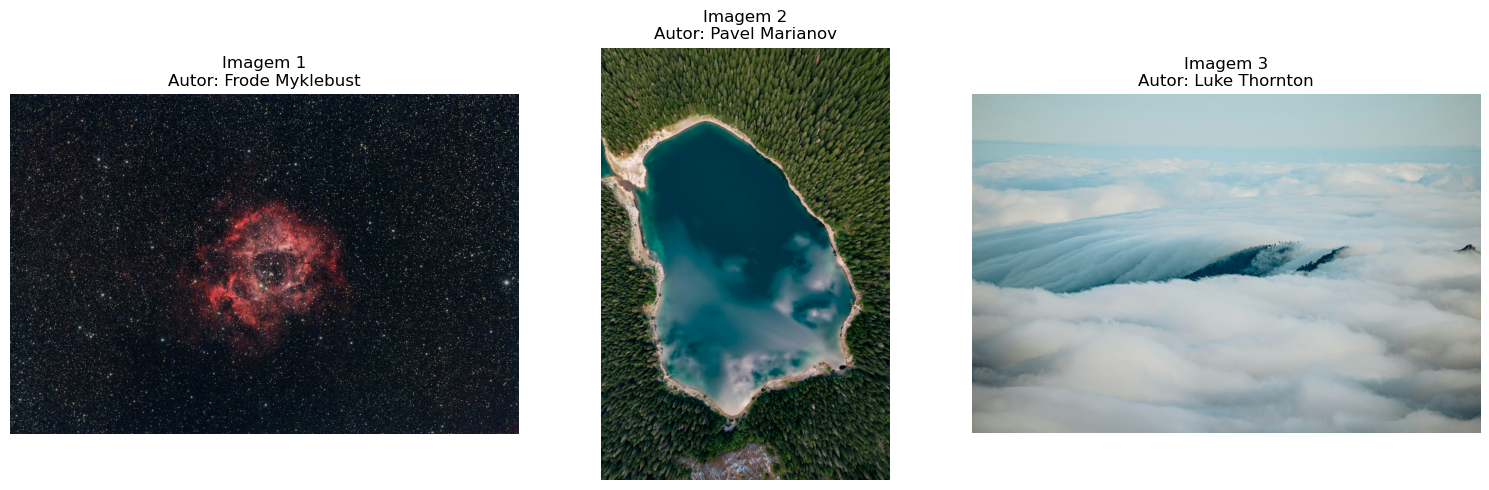

In [5]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

# Link compartilhado do Google Drive
direct_link = "https://drive.google.com/uc?export=download&id=12fRzxsA5NbLGdGjLWkDh8H3G6LZDH-NY"

# Faz a requisição para baixar o conteúdo do arquivo JSON
response = requests.get(direct_link)
if response.status_code == 200:
    # Carrega o conteúdo JSON em um objeto Python
    dados = json.loads(response.text)
    # Converte os dados para um DataFrame do pandas
    df = pd.DataFrame(dados)
else:
    print("Erro ao baixar o arquivo:", response.status_code)
    exit()

# Função para baixar e abrir uma imagem a partir da URL
def get_image(url):
    try:
        r = requests.get(url, timeout=10)
        if r.status_code == 200:
            return Image.open(BytesIO(r.content))
    except Exception as e:
        print("Erro ao carregar imagem:", e)
    return None

# Seleciona as três primeiras imagens do dataset
first_three = df.head(3)

# Cria uma figura com 3 subplots para exibir as imagens
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for idx, row in first_three.iterrows():
    img_url = row['imagem']  # Campo contendo o link da imagem
    img = get_image(img_url)
    ax = axs[idx]
    if img is not None:
        ax.imshow(img)
        ax.set_title(f"Imagem {idx+1}\nAutor: {row['autor']}")
    else:
        ax.text(0.5, 0.5, "Erro ao carregar imagem", ha='center', va='center')
    ax.axis('off')

plt.tight_layout()
plt.show()


### Resumo das interações com GPT 4 💬

<b>Prompt:</b>
Preciso de um script em Python usando Selenium com Chrome em modo headless para coletar periodicamente informações da página de tendências do Unsplash: https://unsplash.com/t/wallpapers.

Ele deve coletar informações de cada imagem:

<li>URL da imagem </li>
<li>Nome do autor</li>
<li>Número de visualizações</li>
<li>Número de downloads</li>
<li>Tags </li>
<li>Data de publicação </li>
<li>Licença </li>

</code>
<br />

vou colocar algumas informações que podemos ajudar o código

não tem data de publicação em todos mas esta "Publicada" e a frente vem o período, geralmente no span class="X5fE_ yZhvJ"

Já a class do autor é bimlc Pc_c1 rkYpC wQd_A

Identifiquei que as tags estão dentro da class qOAId yZhvJ FTKrh, a classa aparece várias vezes mas pode váriar a quantidade pq cada uma representa uma tag, mas elas estão todas dentro da tag uN4_r J83KD

total de donwloads e visualizações estão assim:

<font size="1">Observações Gerais:
O trabalho desenvolvido contou também com o auxílio da ferramenta ChatGPT na etapa de correção e refinamento dos textos: Melhorias na clareza, concisão e rigor técnico, contribuindo para uma escrita fluente e coerente.